# Data Cleaning with Pandas

In [1]:
import pandas as pd

## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

Now, we'll need to download the two data files that we need. We can do this at the command line:

```bash
wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
wget https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
```

*Note:* If you do not have the `wget` command yet, you can install it: `brew install wget`.

Note that `%20` in a URL translates into a space. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the tile that you want to unzip.


You can use tab completion (press the `tab` key after the first three letters) to fill in the names, including spaces. This will 

In [26]:
sales_df = pd.read_csv('data/EXTR_RPSale.csv')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [3]:
sales_df.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,1235111,2704079,2584094,1056831
Major,138860,664885,423943,403700,951120
Minor,110,40,50,715,900
DocumentDate,08/21/2014,07/09/1991,10/11/2014,01/04/2013,04/20/1989
SalePrice,245000,0,0,0,85000
RecordingNbr,20140828001436,199203161090,20141205000558,20130110000910,198904260448
Volume,,071,,,117
Page,,001,,,053
PlatNbr,,664885,,,951120
PlatType,,C,,,P


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [27]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']].copy()

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037951 entries, 0 to 2037950
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 62.2+ MB


In [28]:
# reading in a .zip file is poor form! .zip can have more than one file!

bldg_df = pd.read_csv('/data/EXTR_ResBldg.csv')


//anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Another warning! Which column has index 11?

In [16]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [17]:
bldg_df.head().T

,0,1,2,3,4
Major,4000,4000,4000,4000,4100
Minor,398,460,635,736,230
BldgNbr,1,1,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,14415 45TH LN S,4226 S 146TH ST 98168,4831 S 146TH ST 98168,4429 S 146TH ST 98168,14835 42ND AVE S 98168
BuildingNumber,14415,4226,4831,4429,14835
Fraction,,,,,
DirectionPrefix,,S,S,S,
StreetName,45TH,146TH,146TH,146TH,42ND
StreetType,LN,ST,ST,ST,AVE


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [29]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']].copy()

In [31]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513242 entries, 0 to 513241
Data columns (total 4 columns):
Major            513242 non-null int64
Minor            513242 non-null int64
SqFtTotLiving    513242 non-null int64
ZipCode          468472 non-null object
dtypes: int64(3), object(1)
memory usage: 15.7+ MB


In [32]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

In [33]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [ ]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [34]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [35]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037951 entries, 0 to 2037950
Data columns (total 4 columns):
Major           float64
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.2+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [36]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [37]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037951 entries, 0 to 2037950
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 62.2+ MB


Now, let's try our join again.

In [38]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [39]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


In [41]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455450 entries, 0 to 1455449
Data columns (total 6 columns):
Major            1455450 non-null float64
Minor            1455450 non-null float64
DocumentDate     1455450 non-null object
SalePrice        1455450 non-null int64
SqFtTotLiving    1455450 non-null int64
ZipCode          1335603 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 77.7+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [42]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
23,717370.0,350.0,12/01/1997,0,3380,NaN
24,717370.0,350.0,09/13/2004,300000,3380,NaN
25,717370.0,350.0,02/06/2006,901000,3380,NaN
42,277110.0,1923.0,02/08/2007,372500,1000,NaN
43,277110.0,1923.0,02/08/2007,0,1000,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

In [43]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


(array([ 41569., 136187., 155519., 133897., 101402.,  76360.,  49435.,
         38348.,  28514.,  22105.,  16862.,  12877.,   8988.,   5749.,
          5149.,   3706.,   3844.,   3047.,   2770.,   2408.]),
 array([      0.,   75000.,  150000.,  225000.,  300000.,  375000.,
         450000.,  525000.,  600000.,  675000.,  750000.,  825000.,
         900000.,  975000., 1050000., 1125000., 1200000., 1275000.,
        1350000., 1425000., 1500000.]),
 <a list of 20 Patch objects>)

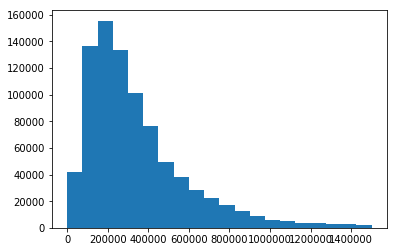

In [71]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(sd_sale_clean['SalePrice'], bins=20, range=(0, 1.5e6))

# Your turn: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

In [61]:
# drop invalid sale price rows (remove rows with sale price < 10,000)
sd_sale_clean = sales_data.loc[sales_data['SalePrice'] > 10000]

sd_sale_clean[['SalePrice']].describe()
# sd_sale_clean.loc[sd_sale_clean['SalePrice'] < 10000]

,SalePrice
count,8.719100e+05
mean,4.374130e+05
std,8.878973e+05
min,1.000500e+04
25%,1.670000e+05
50%,2.800000e+05
75%,4.600000e+05
max,3.750000e+07


In [86]:
#drop invalid sale price to living rows SqFtTotLiving < 200
#sd_clean = sd_sale_clean.loc[]

sd_sale_sqft_clean = sd_sale_clean.loc[sd_sale_clean['SqFtTotLiving'] > 200]
sd_sale_sqft_clean.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
6,423943.0,50.0,07/15/1999,96000,960,98092
7,423943.0,50.0,01/08/2001,127500,960,98092


### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [ ]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head()

### 3. Add a column for PricePerSqFt



### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!